In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
house = '/Users/aishwaryachinnari/DSI-SF-3/datasets/housing_data/housing-data.csv'
house = pd.read_csv(house)

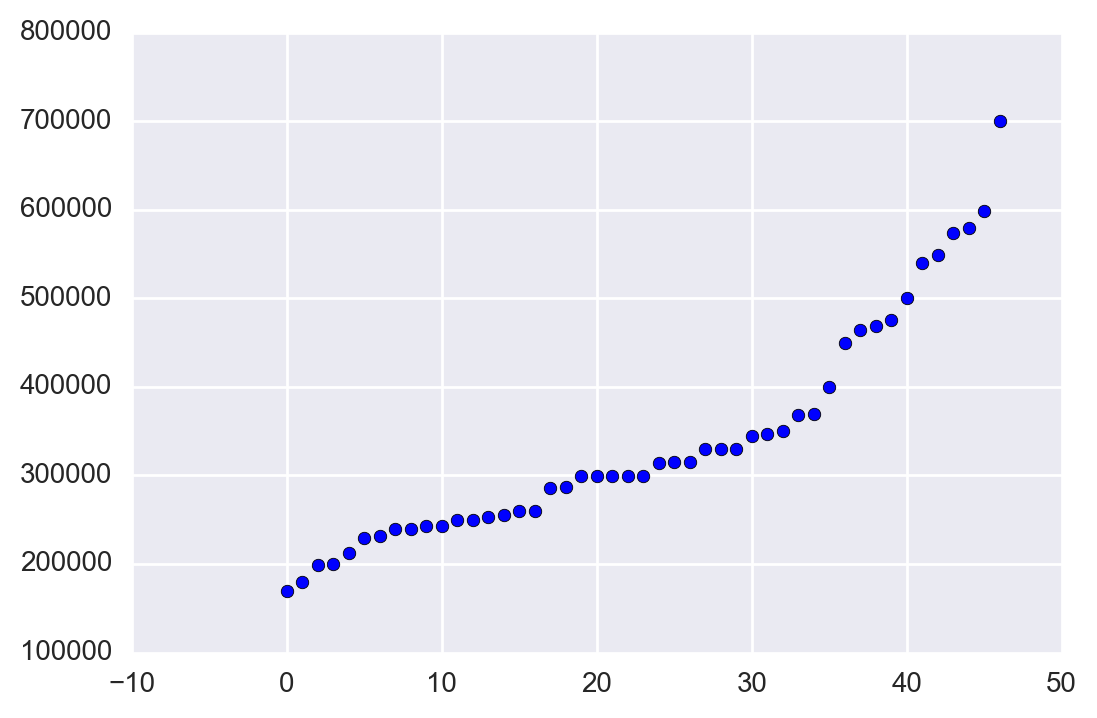

In [3]:
house.head()
plt.scatter(range(len(house.price.sort_values())), house.price.sort_values())

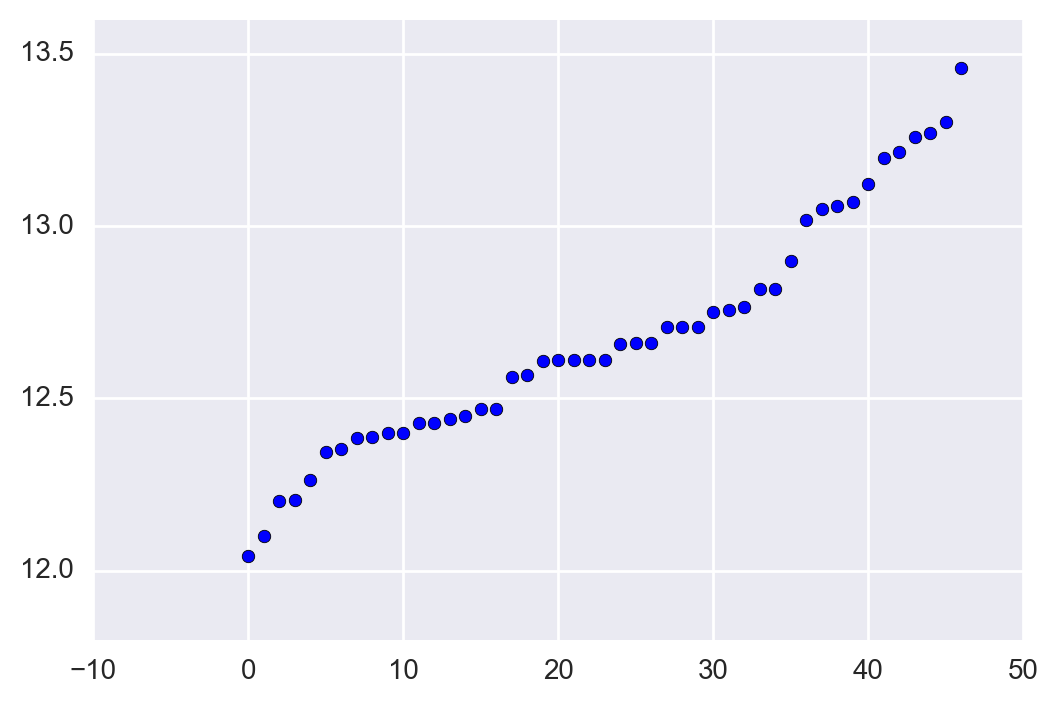

In [5]:
plt.scatter(range(len(house.price.sort_values())), house.price.sort_values().apply(lambda x: np.log(x)))

In [6]:
price = house.price.values/1000.
sqft = house.sqft.values

In [7]:
def calculate_yhat(x, b0, b1):
    return b0 + b1*x

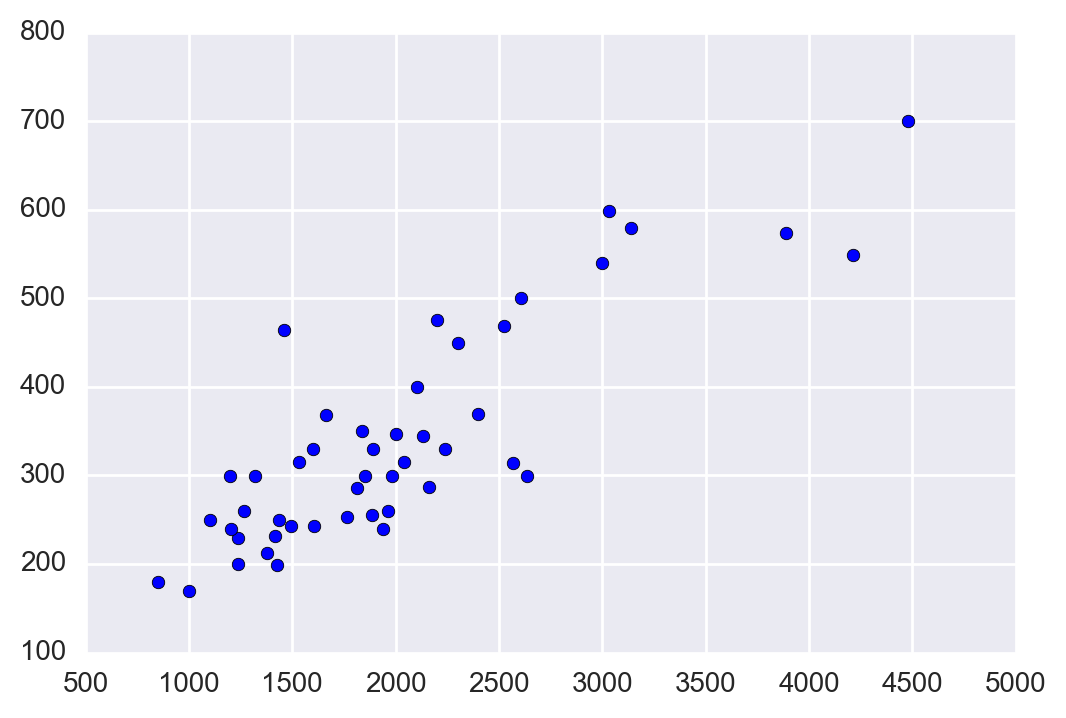

In [8]:
price[0:5]
plt.scatter(sqft, price)

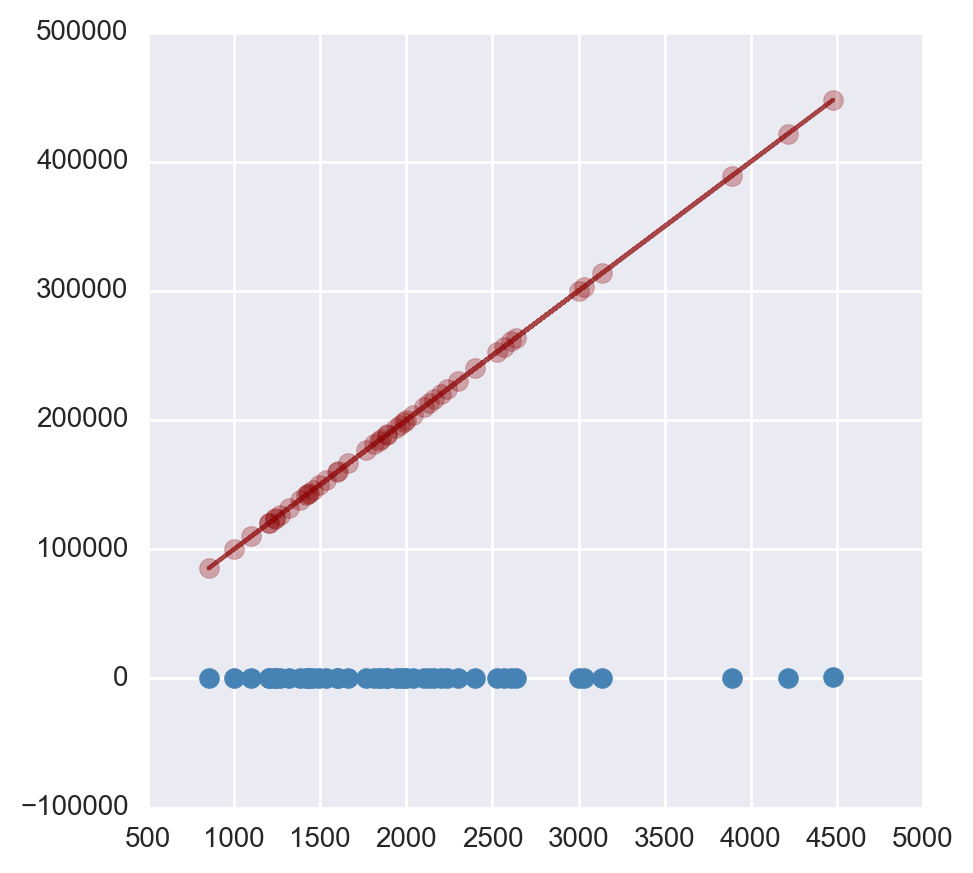

In [9]:

b0 = 10
b1 = 100

def plot_regression(x, y, b0, b1):
    
    fig = plt.figure(figsize=(5,5))
    ax = fig.gca()
    
    yhat = calculate_yhat(x, b0, b1)
    
    ax.scatter(x, y, color='steelblue', s=50)
    ax.scatter(x, yhat, color='darkred', s=50, alpha=0.3)
    
    ax.plot(x, yhat, color='darkred', linewidth=1.5, alpha=0.7)
    plt.show()

plot_regression(sqft, price, b0, b1)

In [10]:
def calculate_residuals(y, yhat):
    return y - yhat

In [11]:
def sum_sq_errors(errors):
    return np.sum(errors**2)

In [12]:
price_hat = calculate_yhat(sqft, b0, b1)
print price_hat[0:5]
residuals = calculate_residuals(price, price_hat)
print residuals[0:5]
sq_resids = sum_sq_errors(residuals)
print sq_resids

[210410 160010 240010 141610 300010]
[-210010.1 -159680.1 -239641.  -141378.  -299470.1]
2.16480440851e+12


In [13]:
print sum_sq_errors(calculate_residuals(price, calculate_yhat(sqft, b0, b1)))

2.16480440851e+12


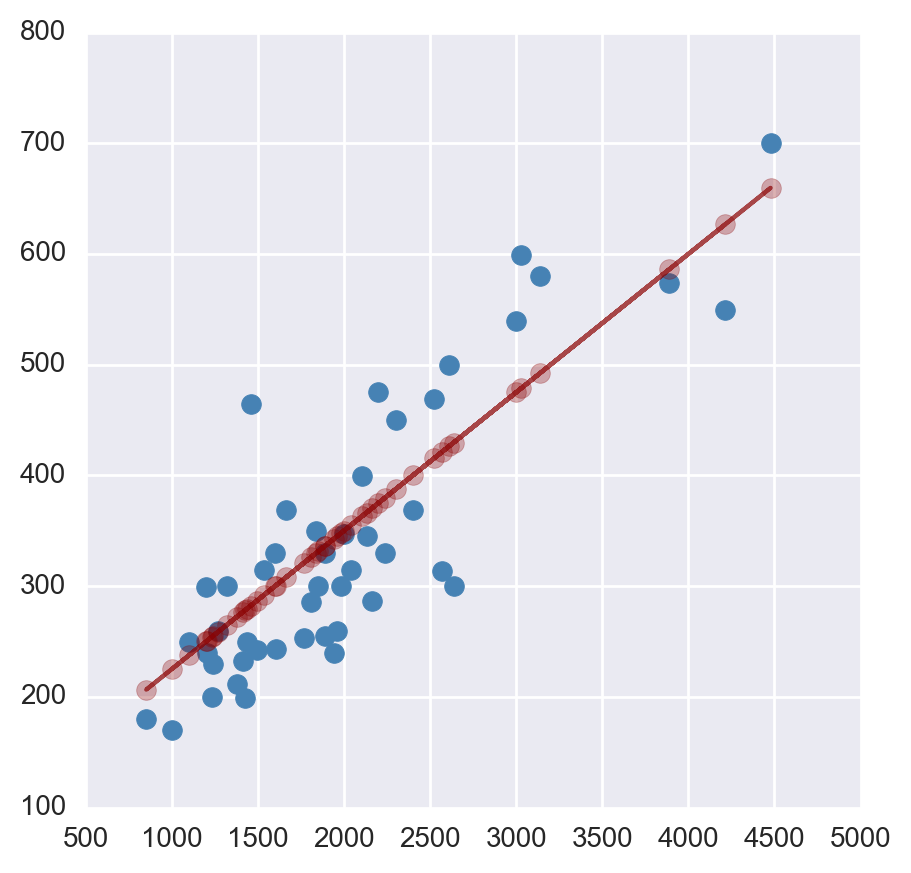

In [14]:
b0 = 100
b1 = .125
plot_regression(sqft,price,b0,b1)

In [15]:
def calc_beta_one(x, y):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    
    numerator = np.sum(( y - mean_y ) * (x - mean_x))
    denominator = np.sum((x - mean_x) ** 2)
    
    return numerator / denominator


def calc_beta_zero(x, y, b1):
    mean_y = np.mean(y)
    mean_x = np.mean(x)
    return mean_y - b1 * mean_x

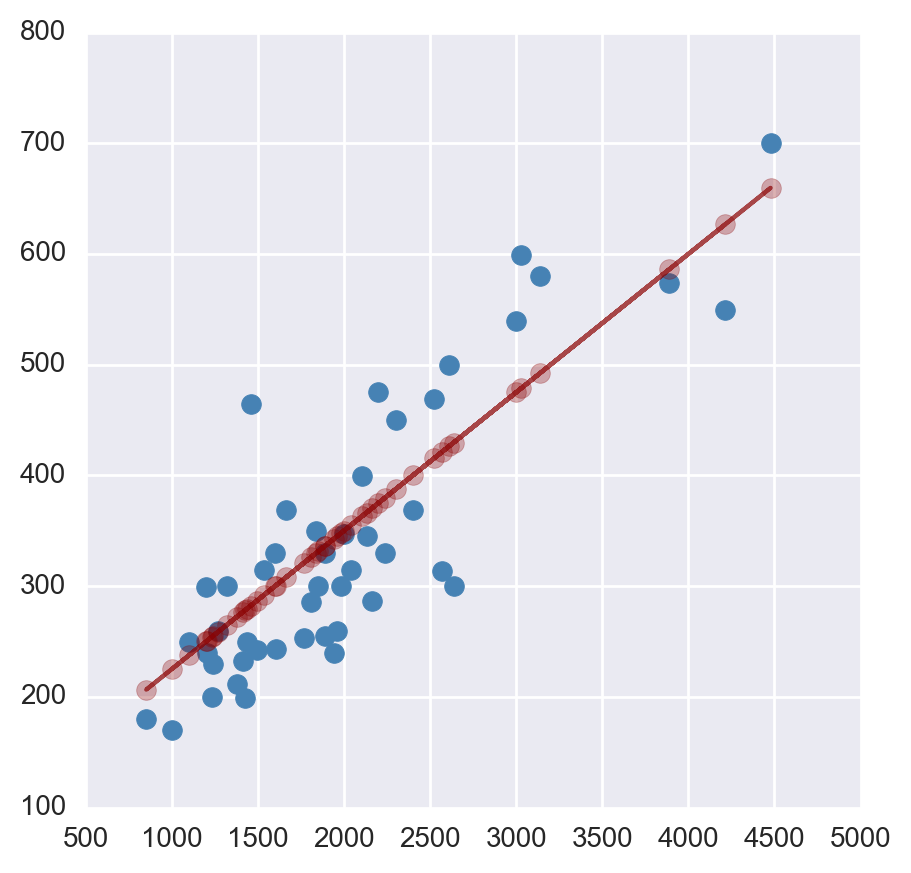

In [16]:
plot_regression(sqft, price, b0, b1)

In [17]:
b1  = calc_beta_one(sqft, price)
b0  = calc_beta_zero(sqft, price, b1)
print b1, b0

0.13452528772 71.2704924487


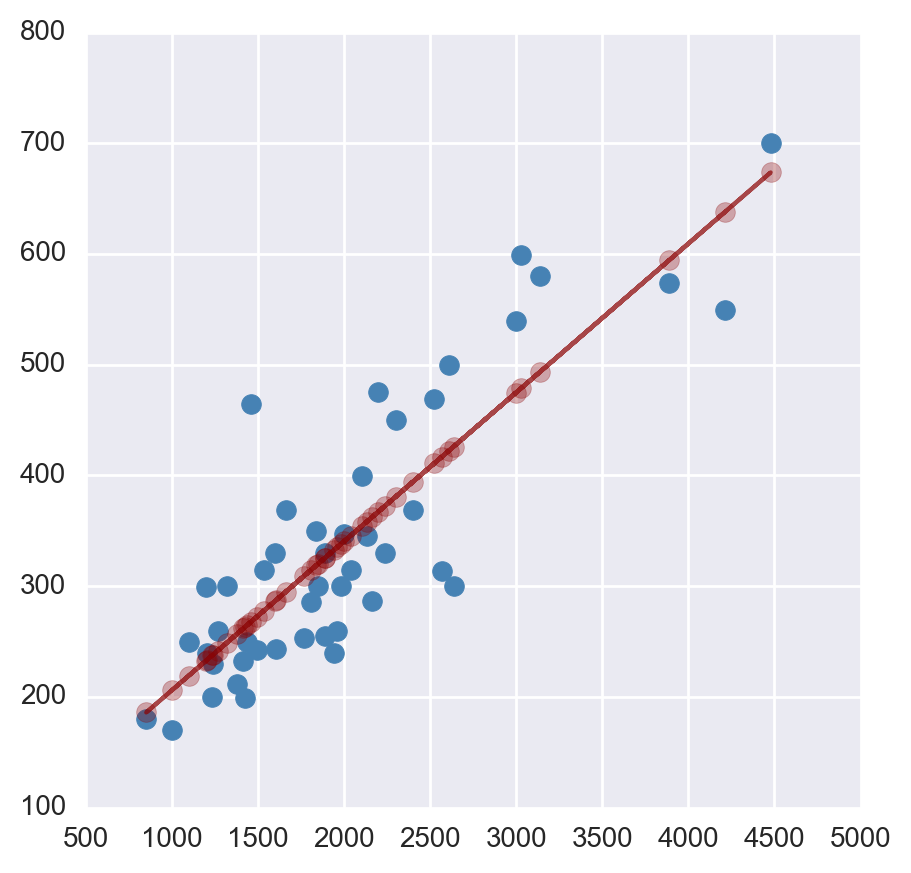

In [18]:
plot_regression(sqft, price, b0, b1)

In [19]:
def pearson(x,y):
    return np.cov(x,y)[0,1]/((np.std(x))*(np.std(y)))

r=pearson(sqft,price)

print r

0.87357427968


In [20]:
np.cov(sqft, price)

array([[ 631551.8307123 ,   84959.69173682],
       [  84959.69173682,   15634.97648858]])

In [21]:
def pearson2(x, y):
    n = np.sum((y - np.mean(y))*(x - np.mean(x)))
    d = np.sqrt(np.sum((x - np.mean(x))**2)) * np.sqrt(np.sum((y - np.mean(y))**2))
    return n/d

other_r = pearson([1,4,9], [10,18,4])
print other_r

-0.827866328931


In [22]:

vals = [1,2,3,11,11.2,11.9,20.3]
print np.mean(vals)
print np.sum(vals-np.mean(vals))

8.62857142857
-8.881784197e-15


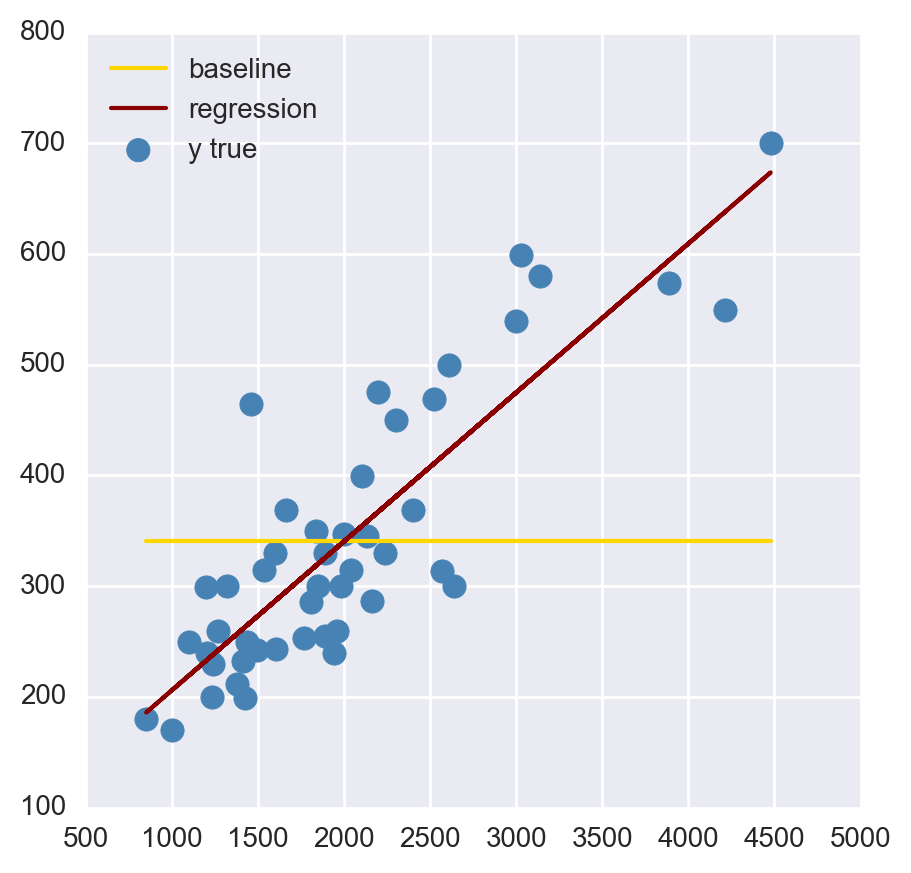

In [23]:
fig = plt.figure(figsize=(5,5))
ax = fig.gca()

yhat = calculate_yhat(sqft, b0, b1)
y_mean = np.mean(price)

ax.scatter(sqft, price, color='steelblue', s=70, label='y true')
ax.plot([np.min(sqft), np.max(sqft)], [y_mean, y_mean], color='gold', linewidth=1.5, label='baseline')
ax.plot(sqft, yhat, color='darkred', linewidth=1.5, label='regression')

plt.legend(loc='upper left')
plt.show()

In [24]:

def calculate_r2(y, yhat):
    err_total = (y-np.mean(y))**2
    err_resid = (y - yhat)**2
    ss_total = np.sum(err_total)
    ss_resid = np.sum(err_resid)
    return 1 - (ss_resid/ss_total)

yhat = calculate_yhat(sqft, b0, b1)
print 'Regression R2:', calculate_r2(price, yhat)
print 'Baseline R2:', calculate_r2(price, np.mean(price))

Regression R2: 0.731003783976
Baseline R2: 0.0


In [25]:
pearson2(sqft, price)**2

0.73100378397553023

In [26]:
house['intercept'] = 1
design = house[['intercept','sqft','bdrms','age']]
design.head()

,intercept,sqft,bdrms,age
0,1,2104,3,70
1,1,1600,3,28
2,1,2400,3,44
3,1,1416,2,49
4,1,3000,4,75


In [27]:
design = design.values
design[0:5,:]

array([[   1, 2104,    3,   70],
       [   1, 1600,    3,   28],
       [   1, 2400,    3,   44],
       [   1, 1416,    2,   49],
       [   1, 3000,    4,   75]])

In [28]:
X = design
x_x = np.dot(X.T, X)
x_x_inv = np.linalg.inv(x_x)
beta = np.dot(x_x_inv, X.T)
beta_vec = np.dot(beta, price)

In [29]:
yhat = beta_vec[0] + (X[:,1]*beta_vec[1] + X[:,2]*beta_vec[2] + X[:,3]*beta_vec[3])

In [30]:
yhat

array([ 354.06248251,  287.24887063,  397.41726196,  268.52715386,
        469.87894532,  329.59112619,  279.35225679,  260.7886237 ,
        257.73225464,  273.53520929,  327.70682348,  343.06402719,
        326.27527226,  669.30604312,  238.55316519,  372.18211686,
        254.09517617,  232.47009254,  421.08427169,  478.58409096,
        309.21830399,  331.85666518,  289.02447818,  327.03616774,
        605.67592658,  214.98247519,  267.38210452,  417.49120685,
        370.84977866,  431.9827603 ,  328.19675492,  222.75891471,
        336.11749247,  498.2390328 ,  308.35192434,  262.75049731,
        237.43629823,  352.75353862,  639.90174497,  355.71531586,
        303.81315675,  375.41354193,  411.00887849,  227.61647382,
        188.23672489,  310.81593795,  233.3136404 ])

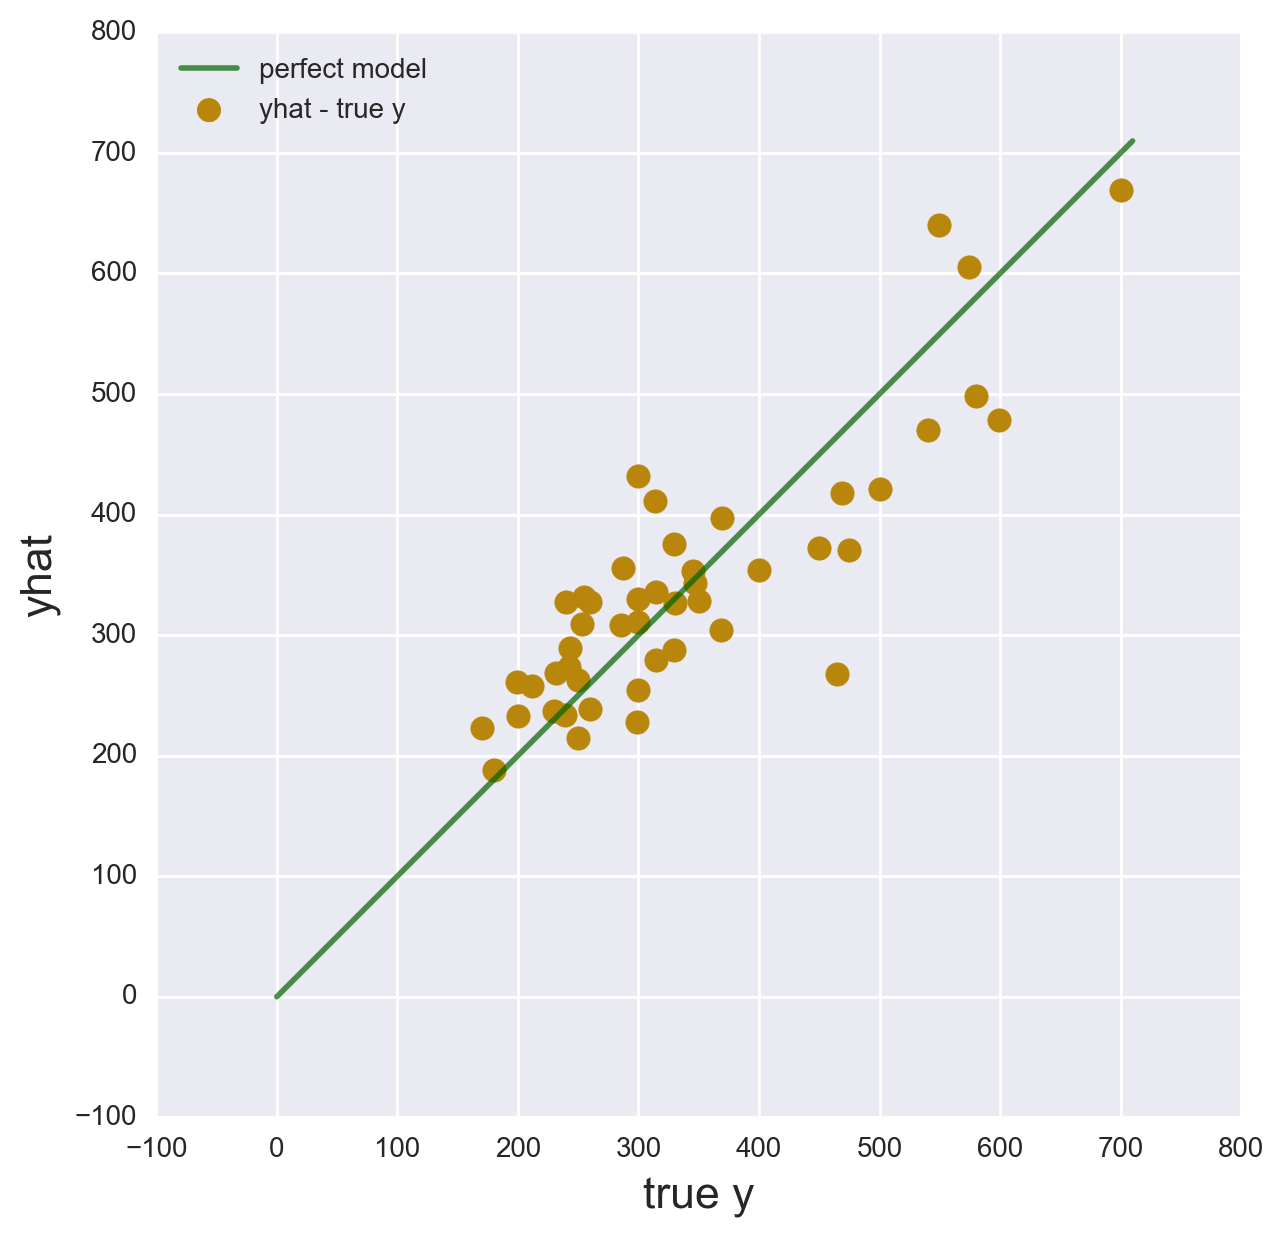

In [31]:
fig = plt.figure(figsize=(7,7))
ax = fig.gca()

ax.scatter(price, yhat, color='darkgoldenrod', s=70, label='yhat - true y')

max_x = np.max(price)+10

ax.plot([0, max_x], [0, max_x], color='darkgreen',
        linewidth=2.0, alpha=0.7, label='perfect model')

ax.set_xlabel('true y', fontsize=16)
ax.set_ylabel('yhat', fontsize=16)

plt.legend(loc='upper left')

plt.show()


In [32]:
calculate_r2(price, yhat)

0.73316399906900243